In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["savefig.dpi"] = 300
plt.rcParams['savefig.bbox'] = 'tight'

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### 1. Load the cancer data set and check its size

In [4]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

In [5]:
X.shape

(569, 30)

In [7]:
X[:1]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01]])

In [8]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
np.unique(y)

array([0, 1])

### 2. Form train and test dasets and scale the data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [58]:
# scale dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [59]:
X_test = scaler.transform(X_test)

### 3. Fit logistic regression to the first two features of your dataset

In [60]:
lr = LogisticRegression()

In [61]:
lr.fit(X_train[:,:2], y_train)  # 2 features

LogisticRegression()

In [62]:
lr.score(X_train[:, :2], y_train)

0.9014084507042254

In [63]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([159, 267], dtype=int64))

In [76]:
#with KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train[:, :2], y_train)
knn.score(X_train[:, :2], y_train)

0.9131455399061033

### 4. Create a scatter plot for the first two features of the train data set and draw the classification line on the graph

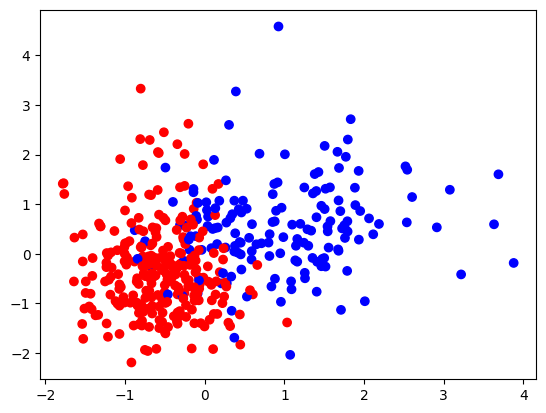

In [65]:
# plt.scatter(X_train[:, 0], X_train[:, 1])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')

In [66]:
# Yi = W0 + W1X1i + W2X2i
# W0 = bias_term / intercept


w0 = lr.intercept_

coef = lr.coef_
w1 = coef[0, 0]
w2 = coef[0, 1]


w0, w1, w2

(array([0.64294808]), -3.4637679987567656, -0.8782227649730281)

In [67]:
X_train[:, 0].min(), X_train[:, 0].max()

(-1.7805556254819008, 3.8770392135187963)

In [68]:
x1 = np.linspace(X_train[:, 0].min(), X_train[:, 0].max())
x1

array([-1.78055563, -1.66509451, -1.54963339, -1.43417227, -1.31871115,
       -1.20325003, -1.08778891, -0.97232779, -0.85686667, -0.74140555,
       -0.62594443, -0.51048331, -0.3950222 , -0.27956108, -0.16409996,
       -0.04863884,  0.06682228,  0.1822834 ,  0.29774452,  0.41320564,
        0.52866676,  0.64412788,  0.759589  ,  0.87505012,  0.99051123,
        1.10597235,  1.22143347,  1.33689459,  1.45235571,  1.56781683,
        1.68327795,  1.79873907,  1.91420019,  2.02966131,  2.14512243,
        2.26058355,  2.37604466,  2.49150578,  2.6069669 ,  2.72242802,
        2.83788914,  2.95335026,  3.06881138,  3.1842725 ,  3.29973362,
        3.41519474,  3.53065586,  3.64611698,  3.76157809,  3.87703921])

In [69]:
x2 = -(w0/w2)-(w1/w2)*x1
x2

array([ 7.75472915e+00,  7.29934294e+00,  6.84395674e+00,  6.38857054e+00,
        5.93318434e+00,  5.47779813e+00,  5.02241193e+00,  4.56702573e+00,
        4.11163953e+00,  3.65625333e+00,  3.20086712e+00,  2.74548092e+00,
        2.29009472e+00,  1.83470852e+00,  1.37932231e+00,  9.23936112e-01,
        4.68549910e-01,  1.31637074e-02, -4.42222495e-01, -8.97608697e-01,
       -1.35299490e+00, -1.80838110e+00, -2.26376730e+00, -2.71915351e+00,
       -3.17453971e+00, -3.62992591e+00, -4.08531211e+00, -4.54069831e+00,
       -4.99608452e+00, -5.45147072e+00, -5.90685692e+00, -6.36224312e+00,
       -6.81762933e+00, -7.27301553e+00, -7.72840173e+00, -8.18378793e+00,
       -8.63917414e+00, -9.09456034e+00, -9.54994654e+00, -1.00053327e+01,
       -1.04607189e+01, -1.09161051e+01, -1.13714913e+01, -1.18268776e+01,
       -1.22822638e+01, -1.27376500e+01, -1.31930362e+01, -1.36484224e+01,
       -1.41038086e+01, -1.45591948e+01])

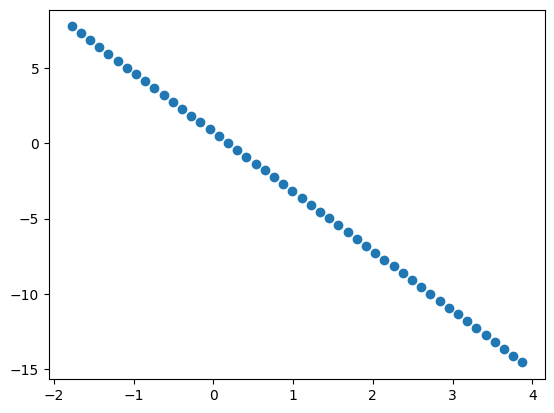

In [70]:
plt.scatter(x1, x2)

(-3.0, 4.0)

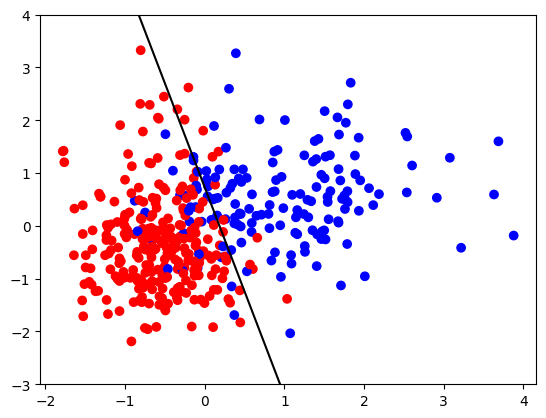

In [75]:
plt.plot(x1, x2, c='k')
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='bwr')
plt.ylim(-3, 4)


Let us pick two points $(x_{00},x_{10})$ and $(x_{01},x_{11})$ on the line $c_0x_0+c_1x_1+b=0$

Let us show these two points on the line:

\begin{align*}
c_0x_{00}+c_1x_{10}&=-6\\
c_0x_{01}+c_1x_{11}&=-6
\end{align*}
Let us subtract the second euation from the first, then we have $(c_0, c_1)\cdot (x_{01}-x_{00}, x_{10}-x_{11})=0$. $(x_{01}-x_{00}, x_{10}-x_{11})$ represents a vector on the line.

### 5. Create a toy dataset using Scikitlearn's make_blobs function.
- Use random_state=4
- Fit LogisticRegression() for C=0.1, 1, 100
- Plot the data on three figures and plot the classification line for each C value.

# Multiclass
- Load Iris dataset with `load_iris`
- check the shape and number of unique classes
- Fit Logistic regression and Linear SVC on the dataset
- Print the coefficients
- Print the intercept

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = 